<center>
<img src="images/ods_stickers.jpg" />
    
# Introducción al Machine Learning 2020

Basado en material de  [Yury Kashnitsky](https://yorko.github.io). Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

# <center>  Visual data analysis
## Ejercicio02 Analizando pasajeros del "Titanic" 

**Complete el código que falta ("# You code here"). No es necesario seleccionar respuestas en un formulario web.**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Leer datos**

In [2]:
train_df = pd.read_csv("data/titanic_train.csv", 
                       index_col='PassengerId') 

In [3]:
train_df.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [4]:
train_df.describe(include='all')

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Dahlberg, Miss. Gerda Ulrika",male,NaN,NaN,NaN,CA. 2343,NaN,G6,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Esta es una descripción de las variables:

|  Name  | Description | Value Type | Statistical Type |
|---         |---       |---     |---
| **Survived** | Whether or not the passenger survived (Yes = 1, No = 0) | Numerical | Categorical |
| **Pclass** | Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd) | Numerical | Categorical |
| **Name** | The passenger's name | String | Categorical |
| **Sex** | Sex | String | Categorical |
| **Age** | Age in year | Numerical |  Quantitative|
| **SibSp** | # of siblings / spouses aboard the Titanic | Numerical | Categorical/Ordinal |
| **Parch** | # of parents / children aboard the Titanic | Numerical | Categorical/Ordinal |
| **Ticket** | Ticket number | String | Categorical |
| **Fare** | Passenger fare | Numerical | Quantitative |
| **Cabin** | Cabin number | String | Categorical |
| **Embarked** | Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton) | String | Categorical |



**Vamos a sacar la variable`Cabin`, y todas las filas con NaN's y missing values.**

In [6]:
train_df = train_df.drop('Cabin', axis=1).dropna()

In [7]:
train_df.shape

(712, 10)

**1. Cree una figura para visualizar todos los diagramas de dispersión para cada par de características `Age`, `Fare`, `SibSp`, `Parch` y `Survived`. ( `scatter_matrix ` de Pandas or `pairplot` de Seaborn)**

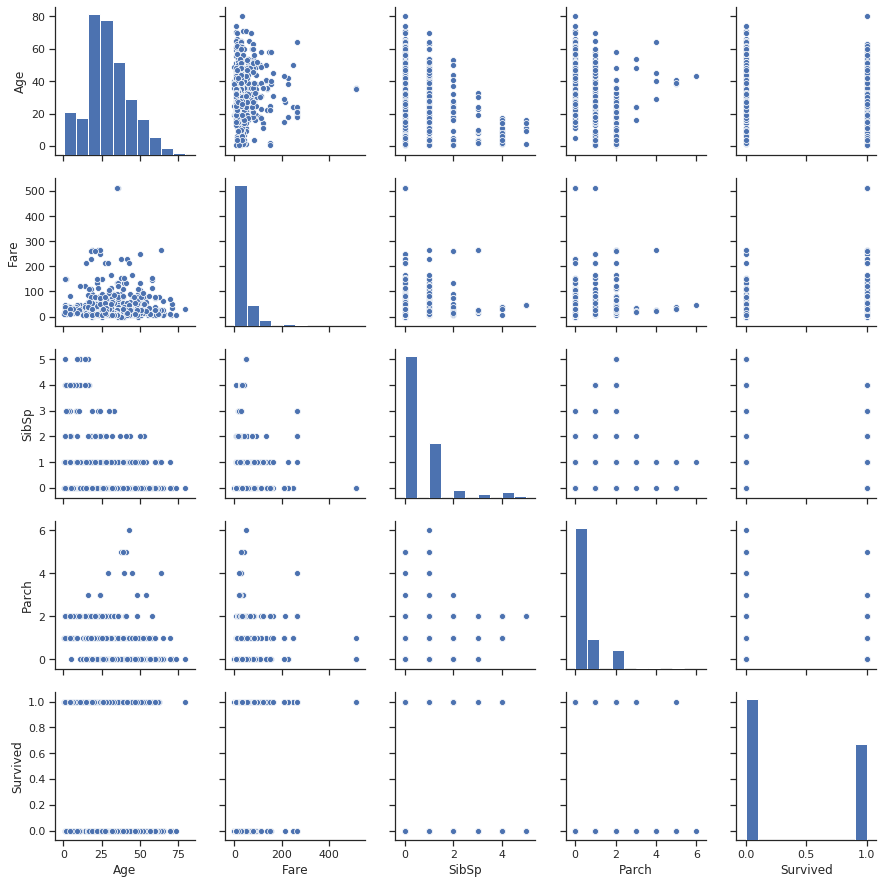

In [8]:
features = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']

sns.set(style="ticks", color_codes=True)

# `pairplot()` may become very slow with the SVG format
%config InlineBackend.figure_format = 'png'

g = sns.pairplot(train_df[features])

**2. ¿Cómo depende el precio del boleto (`Fare`) de `Pclass`? Construya un diagrama de caja (boxplot).**

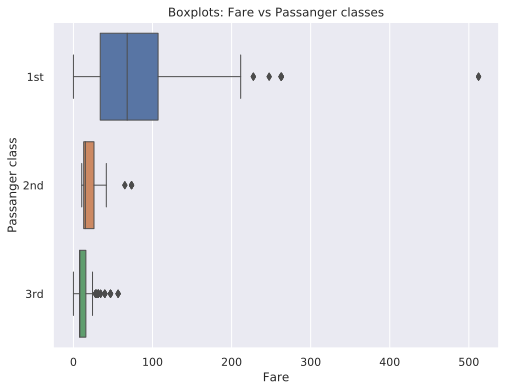

In [9]:
%config InlineBackend.figure_format = 'svg'

sns.set(style="darkgrid")

# Change the values in the Pclass column
label_classes = {1 : '1st', 2 : '2nd', 3: '3rd'}
data = train_df.replace({'Pclass': label_classes})

_, ax = plt.subplots(figsize= (8,6))
ax = sns.boxplot(x='Fare', y='Pclass', data=data, orient='h',
                 linewidth=1, order=['1st', '2nd', '3rd'])

# Changing default seaborn/matplotlib to be more readable
ax.set_xlabel('Fare')
ax.set_ylabel('Passanger class');
ax.set_title('Boxplots: Fare vs Passanger classes');

Observando las *medianas*: la de la primera clase es bastante mayor que la de segunda clase y la de segunda es algo mayor que la de tercera clase; por otro lado, la medianas de segunda y tercera (más esta) están cercas al primer cuartil.

* **Primera clase**: los precios están más dispersos, a juzgar por el rango intercuartil y por el largo de los bigotes. Probablemente exista sesgo a la derecha: hay levemente más espacio de la mediana a Q3 que a Q2 y además el bigote derecho es más largo que el izquirdo. Hay 4 valores atípicos a la derecha. Aparentemente alguien o algunos viajaron gratis, pues el mínimo es 0 y el máximo precio pagado supera los 500.

* **Segunda clase**: los precios están mucho menos dispersos que los de primera, sesgados a la derecha. Hay dos valores atípicos a la derecha (uno de ellos parece superar a la mediana de la primera clase, siendo el máximo). La mediana y el primer cuartil están bastante cercas. Todos pagaron por su boleto: el menor precio de boleto supera a la mediana del precio de la tercer clase.     

* **Tercera clase**: los precios están mucho menos dispersos que los de primera y algo menos que segunda, sesgados a la derecha. No se observa separacion entre la mediana y el primer cuartil. Los bigotes tienen largos similares. Hay muchos valores atípicos a la derecha, uno de de ellos se acerca al primer valor atípico de la segunda clase. El valor mínimo es 0. 

Como conclusion general, podemos ver que en el valor promedio del ticket de primera es mayor que el de segunda y que el de segunda es mayor que el de tercera. Sin embargo no todos los pasajeros de primera clase pagaron más que las otras clases: un poco menos de la mitad de los de primera pago lo mismo que segunda y tercera. La primera clase tiene la mayor variabilidad de precios. 

La segunda y tercera clase tienen un rango mas ajustado de precios; mirando estas dos clases se observa que un poco menos de la mitad de la tercera clase pagó lo mismo que la segunda y que la otra mitad de tercera pago menos que la segunda.

**3. Construya el mismo gráfico pero restringiendo los valores de `Fare` para que sean menores que el cuantil 95%  del vector inicial (para descartar valores atípicos que hacen que el gráfico sea menos claro).**

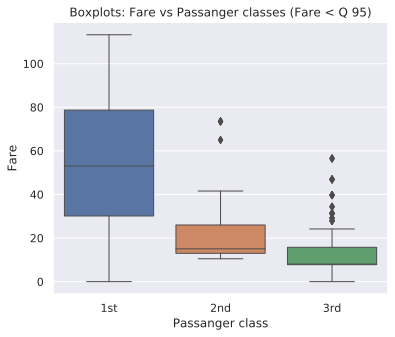

In [10]:
# calculate the quantile 0.95 
Q95 = data.quantile(0.95)['Fare']
# quite the entries with fare ticket less than quantile 0.95
train_df_Q95 = data[data.Fare < Q95]

_, ax = plt.subplots(figsize= (6,5))
ax = sns.boxplot(x='Pclass', y='Fare', data=train_df_Q95, 
                 linewidth=1, order=['1st', '2nd', '3rd'])
ax.set_xlabel('Passanger class')
ax.set_ylabel('Fare');
ax.set_title('Boxplots: Fare vs Passanger classes (Fare < Q 95)');

**4. ¿Cómo depende el porcentaje de pasajeros sobrevivientes del género de los pasajeros? Representarlo con `Seaborn.countplot` usando el argumento `hue`.**

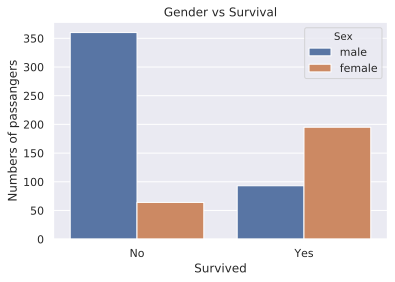

In [11]:
# change the data in Survived column
label_survived = {0 : 'No', 1 : 'Yes'}
data = data.replace({'Survived': label_survived})

ax = sns.countplot(x='Survived', hue='Sex', data=data)
ax.set_ylabel('Numbers of passangers')
ax.set_title('Gender vs Survival');

Mirando el gráfico, se observa que dentro de los que sobrevivieron la cantidad de mujeres (casi 200) **duplica** la cantidad de hombres (casi 100).

**5. ¿Cómo difiere la distribución de los precios de las entradas para los que sobrevivieron y los que no? Representarlo con `Seaborn.boxplot`**

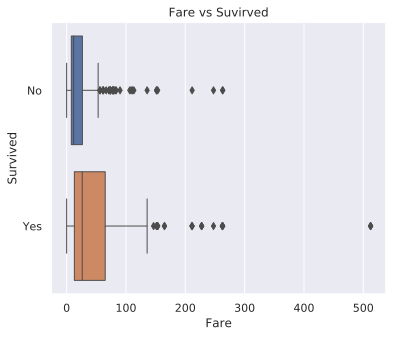

In [18]:
_, ax = plt.subplots(figsize= (6,5))
ax = sns.boxplot(x='Fare', y='Survived', data=data, orient='h',
                 linewidth=1)
ax.set_title('Fare vs Suvirved');

En cuanto a localización, la mediana de los no sobrevivientes está por debajo de la de los sobrevivientes; mas aún la mediana de los sobrevivientes está al mismo nivel del tercer cuartil de los que no sobrevivieron. 

La dispersión de los precios es mayor en los sobrevivientes, dado que el rango intercuartil es más grande y que los bigotes son más amplios. Ambos gráficos parecen mostrar un sesgo a la derecha y tienen valores atípcos a la derecha, muchos más en los que no sobrevivieron. El que pago el boleto más caro sobrevivió.

En conclusion el precio promedio del boleto de los sobrevivientes parecería ser mayor que el de los que no lo hicieron, por lo que si influiría en la posibilidad de sobrevivir.  

**6. ¿Cómo depende la supervivencia de la edad de los pasajeros? Verifique (gráficamente) una suposición de que los jóvenes (<30 años) sobrevivieron con mayor frecuencia que las personas mayores (> 55 años).**

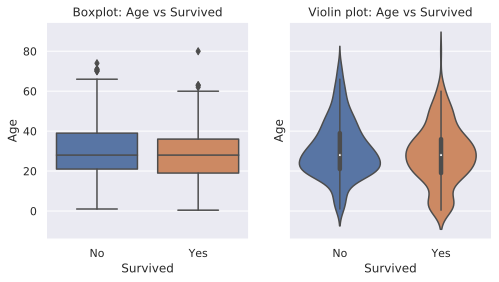

In [16]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(8, 4))

ax_1 = sns.boxplot(y='Age', x='Survived', data=data, ax=axes[0]);
ax_2 = sns.violinplot(y='Age', x='Survived', data=data, ax=axes[1]);
ax_1.set_title('Boxplot: Age vs Survived')
ax_2.set_title('Violin plot: Age vs Survived');

**En el bloxplot**

Observamos que las medianas son similares (o iguales) de la misma manera que los primeros cuartiles (el de los sobrevivientes es ligeramente menor); el tercer cuartil de los que sobrevivieron es algo menor que el de los no sobrevivientes.

En cuanto a la dispersion, los rangos intercuartiles son similares. En los no sobrevivientes parece existir sesgo a la derecha, el bigote es un poco más largo hacia arriba y es mayor la distancia de la mediana al tercer cuartil que al primero. En los sobrevivientes con el bloxplot no es tan claro si hay sesgo, la distancia al primer cuartil es mayor que a al tercero, aunque el bigote hacia arriba parece ser más largo. 

En ambos gráficos hay valores atípicos hacia arriba. La persona más longeva sobrevivió. Los mínimos en ambos grupos son similares.

**En violin plot**

Vemos que las distribuciones son bastantes parecida y se confirma un leve sesgo a la derecha del gráfico de sobrevivientes. 

<br>

Para verificar la suposicion de que los jóvenes (<30 años) sobrevivieron con mayor frecuencia que los personas mayores (>55 años) construimos un *histograma* de la edad de los sobrevivientes.

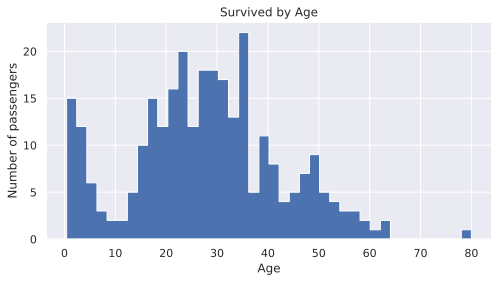

In [35]:
figure = plt.figure(figsize=(8,4))
plt.hist(data[data['Survived']=='Yes']['Age'],
         bins = 40, histtype='stepfilled')
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.title('Survived by Age');

Se observa que las alturas de las barras desde 0 a 30 son mayores qe las alturas desde 55 hasta 80.